In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.integrate import solve_ivp

plt.style.use(["seaborn-v0_8-darkgrid", "seaborn-v0_8-colorblind","seaborn-v0_8-paper"])
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 0.6
color_map = "plasma"

from GFDM import create_system_K_F

In [10]:
# Mesh
nodes_x = 5
nodes_y = 4

coords_x = np.linspace(0,2,nodes_x)
coords_y = np.linspace(0,1,nodes_y)
coords_x,coords_y = np.meshgrid(coords_x,coords_y)

In [11]:
# coords p
p = np.vstack((coords_x.T.flatten(), coords_y.T.flatten())).T
p[:7,:]

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [0.        , 0.66666667],
       [0.        , 1.        ],
       [0.5       , 0.        ],
       [0.5       , 0.33333333],
       [0.5       , 0.66666667]])

(-0.1, 2.1, -0.05, 1.05)

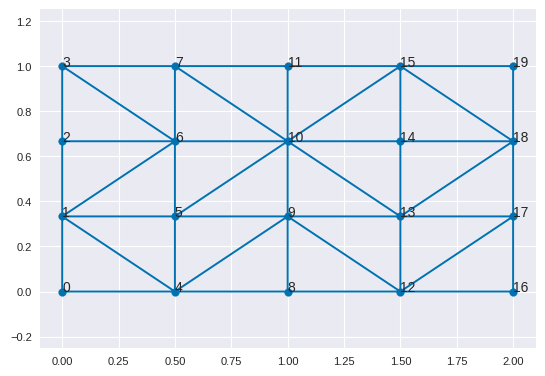

In [12]:
tri = Delaunay(p)
plt.triplot(p[:,0], p[:,1], tri.simplices)
plt.scatter(coords_x,coords_y)
if True:
    for i in range(p.shape[0]):
        plt.text(p[i,0],p[i,1],s=str(i))
plt.axis("equal")

(-0.1, 2.1, -0.05, 1.05)

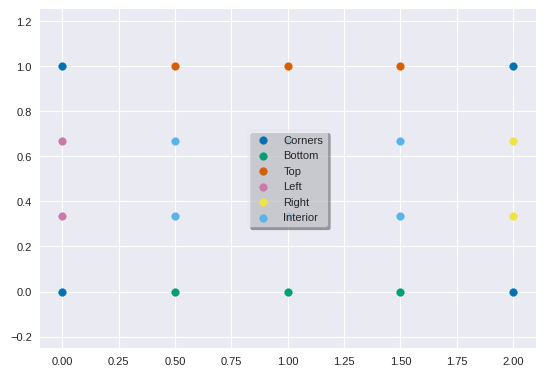

In [13]:
# Boundaries index
N = nodes_x * nodes_y   # total nodes
index_corners = np.array([1, nodes_y,  N-nodes_y+1, N]) - 1      # corners
index_bottom = np.arange(nodes_y, N-nodes_y, nodes_y)                                    # bottom
index_top = np.arange(2*nodes_y-1, N-nodes_y, nodes_y)    # top
index_left = np.arange(1, nodes_y-1)       # left
index_right = np.arange(N-nodes_y+1, N-1)   # right
Boundaries = np.hstack((index_corners,index_bottom,index_top,index_left,index_right))

# interior index
interior = np.arange(0,N)
interior = np.setdiff1d(interior, Boundaries)

plt.scatter(p[index_corners,0], p[index_corners,1], label="Corners")
plt.scatter(p[index_bottom,0], p[index_bottom,1], label="Bottom")
plt.scatter(p[index_top,0], p[index_top,1], label="Top")
plt.scatter(p[index_left,0], p[index_left,1], label="Left")
plt.scatter(p[index_right,0], p[index_right,1], label="Right")
plt.scatter(p[interior,0], p[interior,1], label="Interior")
plt.legend(loc="center")
plt.axis("equal")

In [7]:
# Problem parameters
a = 0.2637
b = 0.1
k = lambda p: 1         # difusividad
f = lambda p: 0         # fuente